# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Cargar-la-intensidad-con-P1-y-P4" data-toc-modified-id="Cargar-la-intensidad-con-P1-y-P4-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar la intensidad con P1 y P4</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calibration parameters</a></div><div class="lev1 toc-item"><a href="#Otros-ajustes" data-toc-modified-id="Otros-ajustes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Otros ajustes</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---1:-sencillo" data-toc-modified-id="Fitting-to-matrices---1:-sencillo-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting to matrices - 1: sencillo</a></div><div class="lev2 toc-item"><a href="#Ajuste-global:-p0,-p1,-angulo" data-toc-modified-id="Ajuste-global:-p0,-p1,-angulo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ajuste global: p0, p1, angulo</a></div><div class="lev3 toc-item"><a href="#Verificación" data-toc-modified-id="Verificación-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Verificación</a></div><div class="lev3 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparación</a></div><div class="lev3 toc-item"><a href="#Conclusión" data-toc-modified-id="Conclusión-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Conclusión</a></div>

# Determinación de los parámetros del divisor de haz usando dos polarizadores

**Autor**: Jesús del Hoyo

**Fecha**:   2/08/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 4 LPNIRE100-B (P2), solo en Experimento 2.

We assume that beam splitters behaves as a diattenuator retarder with $J_{xy} = J_{yx} = 0$:

\begin{equation}
J_{BS}(0)=\left[\begin{array}{cc}
A & 0  \\
0 & B e^{i\delta}
\end{array}\right]
\end{equation}

**4th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, P1 and P2 rotation.
1. 2D, R1 and P2 rotation.

Parameters that can be extracted from fit:
1. Theta 0 of R1.
1. R parameters (moddeled as diattenuator retarder).



\begin{equation}
M_{air}=\left[\begin{array}{cc}
1.0000 & -0.0070 & -0.0028 & -0.0007  \\
0.0073 & 1.0000 & -0.0066 & 0.0004  \\
0.0022 & 0.0055 & 1.0000 & 0.0050  \\
-0.0003 & 0.0054 & 0.0011 & 1.0000
\end{array}\right]
\end{equation}

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function

import time
import pprint

from numpy import array, matrix, matmul, power, sum, size, zeros
from math import sin, cos, pi, sqrt
from cmath import exp

from phyton_optics import degrees , sp, plt

from scipy import optimize, exp
from scipy.io import loadmat

from polarimeter.utils import plot_experiment_residuals_1D
from polarimeter.polarimeter import (get_polarimeter_parameters, intensity, 
                                    polarimeter_matrices, get_light_parameters)

from phyton_optics.polarization_jones import rotation
from phyton_optics.polarization_stokes import polarizer_linear, rotate_mueller, polarized_light
from polarimeter.utils import dibujar_2d_fitting


from polarimeter.polarimeter import Intensity_Rotating_Elements
import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import numpy as np
import os

## Load data

In [3]:
# Go to the desired folder
#dir = 'calibration'
print(os.getcwd())
#os.chdir(dir)

# Load file, Experiment 5a
filename = 'Experimento_5a_2018-07-31.npz'
data = np.load(filename)
# Rename variables
angle_e5ax = data['angle2x']*degrees
angle_e5ay = data['angle2y']*degrees
Imax_e5 = data['intensity_max']
I_e5a = data['intensity2']
I_e5a = I_e5a[0:15,0:14] # Wrongy created as a 90x90 zero's matrix

# Load file, Experiment 5b
filename = 'Experimento_5b_2018-07-31.npz'
data = np.load(filename)
# Rename variables
angle_e5bx = data['angle2x']*degrees
angle_e5by = data['angle2y']*degrees
I_e5b = data['intensity2']
I_e5b = I_e5b[0:15,0:14] # Wrongy created as a 90x90 zero's matrix


D:\Codigo UCM\polarimeter\notebooks\calibration


## Experiment 5a: Paralel polarizers

With this simulation we chech thtat the parameters for the quarter waveplate are correct, and we determine th0 for R2. 

Fit parameters for the quarter waveplate: Th0 = [159.02612969]º;


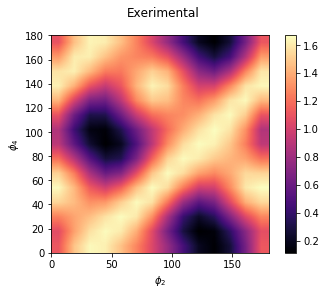

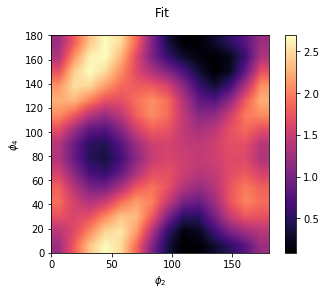

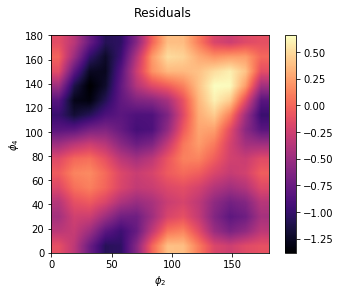

In [6]:
# Initial parameters
Jp = pj.real_polarizer(P1=0.9567, P2=0.138)
Jbs = pj.real_polarizer(P1=0.9024, P2=0.9096)
th0 = [33.98*degrees, 22.7*degrees, 169.4*degrees, 116.87*degrees]
parJr = [0.9628, 0.2205, 149*degrees, 0.4629, 147.1*degrees, 1.0428, 78.9*degrees]
Jr = pj.general_Jones(parJr)
J = [Jp, Jr, Jbs, Jr, Jp]
par0 = 0
# Define calculating and distance functions
def model_func2D(par, th1, th2): 
    th = [0, th1-th0[1], -th0[2], th2-par, 0]
    I = Intensity_Rotating_Elements(J, th, Imax_e5/2)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: Th0 = {}º;'.format(
        (par1/degrees)%180 ))
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')


Really wrong!!! Let`s fit the retarder as a diattenuator retarder and lets see what we obtain.

Fit parameters for the quarter waveplate: A = 1.01107348854; B = 1.01051012333; delta = 81.4815925555º; Th0R1 = 52.0922526675º; Th0R2 = 175.345063798º;


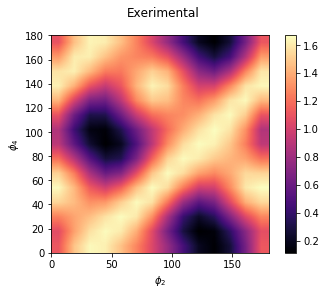

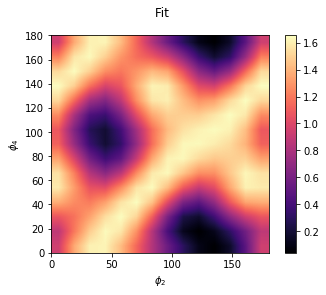

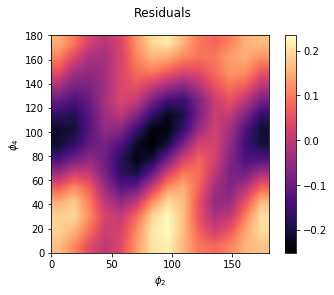

In [8]:
# Initial parameters
Jp = pj.real_polarizer(P1=0.9567, P2=0.138)
Jbs = pj.real_polarizer(P1=0.9024, P2=0.9096)
th0 = [33.98*degrees, 22.7*degrees, 169.4*degrees, 116.87*degrees]
par0 = [.95, 0.95, 90*degrees, 0, 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2): 
    Jr = pj.diattenuator_retarder(delta = par[2], A = par[0], B = par[1])  
    J = [Jp, Jr, Jbs, Jr, Jp]
    th = [0, th1-par[3], -th0[2], th2-par[4], 0]
    I = Intensity_Rotating_Elements(J, th, Imax_e5/2)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0R1 = {}º; Th0R2 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180, (par1[4]/degrees)%180 ))
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

Much better but still wrong! Let`s fit the retarder as a general Jones element.

Fit parameters for the quarter waveplate: Jxx = 1.01749843127; |Jxy| = -0.172500525903; Dxy = 99.9792621025º;
Fit parameters for the quarter waveplate: |Jyx| = 0.20517002302; Dyx = 102.507863185º; |Jyy| = 0.979968433544; Dyy = 77.3992038323º;
Fit parameters for the quarter waveplate: Th0R1 = 44.3826595567º; Th0R2 = 168.481528505º;


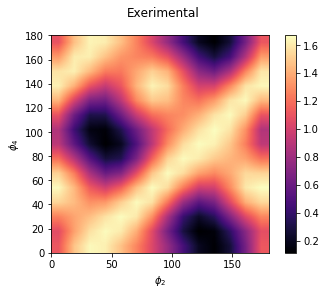

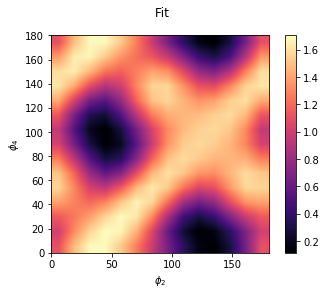

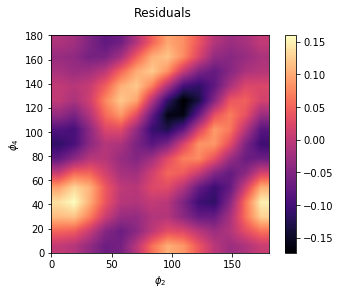

In [9]:
# Initial parameters
Jp = pj.real_polarizer(P1=0.9567, P2=0.138)
Jbs = pj.real_polarizer(P1=0.9024, P2=0.9096)
th0 = [33.98*degrees, 22.7*degrees, 169.4*degrees, 116.87*degrees]
par0 = [0.95, 0, 0*degrees, 0, 0*degrees, 0.95, 90*degrees, 0, 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2): 
    Jr = pj.general_Jones(par)
    J = [Jp, Jr, Jbs, Jr, Jp]
    th = [0, th1-par[7], -th0[2], th2-par[8], 0]
    I = Intensity_Rotating_Elements(J, th, Imax_e5/2)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: Jxx = {}; |Jxy| = {}; Dxy = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the quarter waveplate: |Jyx| = {}; Dyx = {}º; |Jyy| = {}; Dyy = {}º;'.format(
        par1[3], (par1[4]/degrees)%180, par1[5], (par1[6]/degrees)%180))
print('Fit parameters for the quarter waveplate: Th0R1 = {}º; Th0R2 = {}º;'.format(
        (par1[7]/degrees)%180, (par1[8]/degrees)%180 ))
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

The result is slightly better but not OK. That makes me think that probably both plates are different. Let's try that.

Fit parameters for the quarter waveplate: Jxx = 0.899232207402; |Jxy| = -0.024914181709; Dxy = 37.5172528713º;
Fit parameters for the quarter waveplate: |Jyx| = -0.388684564242; Dyx = 109.74674302º; |Jyy| = 0.867805734174; Dyy = 59.2670095612º;
Fit parameters for the quarter waveplate: Th0R1 = 39.9521544771º; Th0R2 = 165.355302827º;


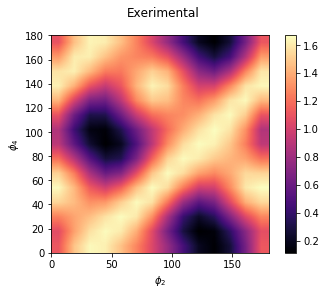

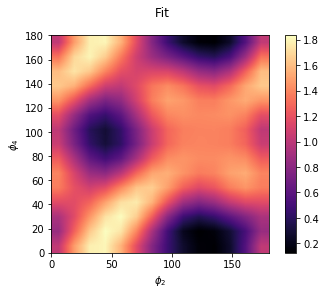

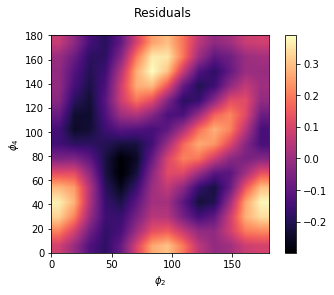

In [10]:
# Initial parameters
Jp = pj.real_polarizer(P1=0.9567, P2=0.138)
Jbs = pj.real_polarizer(P1=0.9024, P2=0.9096)
th0 = [33.98*degrees, 22.7*degrees, 169.4*degrees, 116.87*degrees]
parJr = [0.9628, 0.2205, 149*degrees, 0.4629, 147.1*degrees, 1.0428, 78.9*degrees]
Jr1 = pj.general_Jones(parJr)
par0 = [0.95, 0, 0*degrees, 0, 0*degrees, 0.95, 90*degrees, th0[1], 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2): 
    Jr2 = pj.general_Jones(par)
    J = [Jp, Jr1, Jbs, Jr2, Jp]
    th = [0, th1-par[7], -th0[2], th2-par[8], 0]
    I = Intensity_Rotating_Elements(J, th, Imax_e5/2)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: Jxx = {}; |Jxy| = {}; Dxy = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the quarter waveplate: |Jyx| = {}; Dyx = {}º; |Jyy| = {}; Dyy = {}º;'.format(
        par1[3], (par1[4]/degrees)%180, par1[5], (par1[6]/degrees)%180))
print('Fit parameters for the quarter waveplate: Th0R1 = {}º; Th0R2 = {}º;'.format(
        (par1[7]/degrees)%180, (par1[8]/degrees)%180 ))
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

Wrong!!! Fit Jr1 and Jr2 as diattenuator retarders

Fit parameters for the first quarter waveplate: A1 = 0.747509020606; B1 = 0.746954372425; delta1 = 80.4473537714º;
Fit parameters for the second quarter waveplate: A2 = 1.36715216708; B2 = 1.36722037456; delta2 = 82.7289883697º;
Fit parameters for the quarter waveplate: Th0R1 = 52.0707158724º; Th0R2 = 175.356801223º;


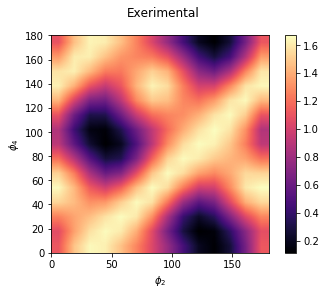

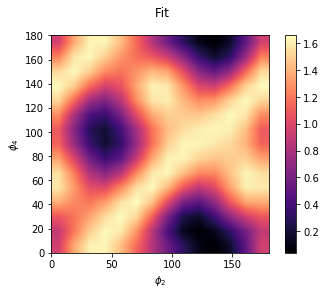

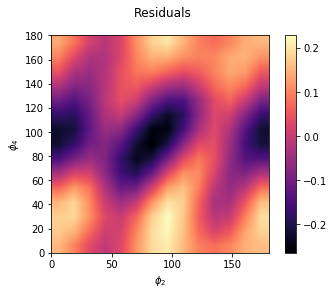

In [11]:
# Initial parameters
Jp = pj.real_polarizer(P1=0.9567, P2=0.138)
Jbs = pj.real_polarizer(P1=0.9024, P2=0.9096)
th0 = [33.98*degrees, 22.7*degrees, 169.4*degrees, 116.87*degrees]
par0 = [0.95, 0.95, 90*degrees, 0.95, 0.95, 90*degrees, th0[1], 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2): 
    Jr1 = pj.diattenuator_retarder(delta = par[2], A = par[0], B = par[1])  
    Jr2 = pj.diattenuator_retarder(delta = par[5], A = par[3], B = par[4])  
    J = [Jp, Jr1, Jbs, Jr2, Jp]
    th = [0, th1-par[6], -th0[2], th2-par[7], 0]
    I = Intensity_Rotating_Elements(J, th, Imax_e5/2)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the first quarter waveplate: A1 = {}; B1 = {}; delta1 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the second quarter waveplate: A2 = {}; B2 = {}; delta2 = {}º;'.format(
        par1[3], par1[4], (par1[5]/degrees)%180))
print('Fit parameters for the quarter waveplate: Th0R1 = {}º; Th0R2 = {}º;'.format(
        (par1[6]/degrees)%180, (par1[7]/degrees)%180 ))
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

The result is bad. Finally, try to fit two general Jones elements.

Fit parameters for the first quarter waveplate: Jxx = 0.950770832201; |Jxy| = 2.4250856134; Dxy = 131.819974487º;
Fit parameters for the first quarter waveplate: |Jyx| = 0.986503642664; Dyx = 67.4876246401º; |Jyy| = 2.31868308411; Dyy = 43.6603848878º;
Fit parameters for the quarter waveplate: Th0R1 = 26.1030530483º; Th0R2 = 173.391730873º;
Fit parameters for the first quarter waveplate: Jxx = 1.74878601577; |Jxy| = -1.70021649422; Dxy = 79.6969899279º;
Fit parameters for the first quarter waveplate: |Jyx| = -1.89547561368; Dyx = 161.931838475º; |Jyy| = 1.93768937162; Dyy = 80.2312340392º;


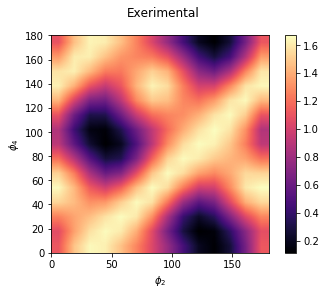

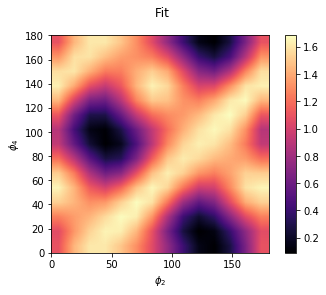

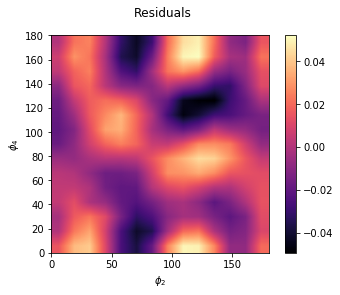

In [15]:
# Initial parameters
Jp = pj.real_polarizer(P1=0.9567, P2=0.138)
Jbs = pj.real_polarizer(P1=0.9024, P2=0.9096)
th0 = [33.98*degrees, 22.7*degrees, 169.4*degrees, 116.87*degrees]
par0 = [0.9628, 0.2205, 149*degrees, 0.4629, 147.1*degrees, 1.0428, 78.9*degrees, th0[1], 0, 0.95, 0, 0*degrees, 0, 0*degrees, 0.95, 90*degrees, ]
# Define calculating and distance functions
def model_func2D(par, th1, th2): 
    Jr1 = pj.general_Jones(par)
    Jr2 = pj.general_Jones(par[9:])
    J = [Jp, Jr1, Jbs, Jr2, Jp]
    th = [0, th1-par[7], -th0[2], th2-par[8], 0]
    I = Intensity_Rotating_Elements(J, th, Imax_e5/2)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the first quarter waveplate: Jxx = {}; |Jxy| = {}; Dxy = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the first quarter waveplate: |Jyx| = {}; Dyx = {}º; |Jyy| = {}; Dyy = {}º;'.format(
        par1[3], (par1[4]/degrees)%180, par1[5], (par1[6]/degrees)%180))
print('Fit parameters for the quarter waveplate: Th0R1 = {}º; Th0R2 = {}º;'.format(
        (par1[7]/degrees)%180, (par1[8]/degrees)%180 ))
print('Fit parameters for the first quarter waveplate: Jxx = {}; |Jxy| = {}; Dxy = {}º;'.format(
        par1[9], par1[10], (par1[11]/degrees)%180))
print('Fit parameters for the first quarter waveplate: |Jyx| = {}; Dyx = {}º; |Jyy| = {}; Dyy = {}º;'.format(
        par1[12], (par1[13]/degrees)%180, par1[14], (par1[15]/degrees)%180))
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

It works, but it is a HORRIBLE result. Lets see if it fits Experiment 5b

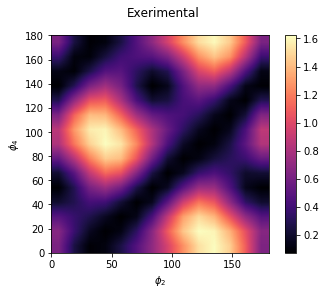

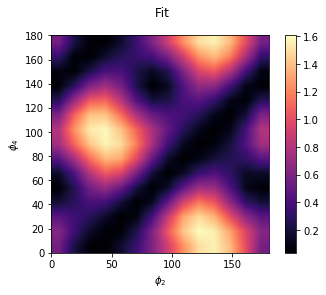

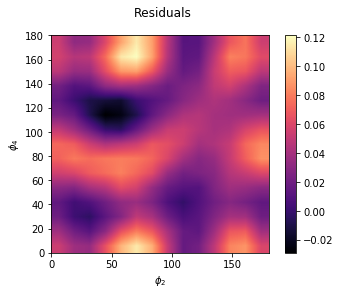

In [16]:
def check_func2D(par, th1, th2): 
    Jr1 = pj.general_Jones(par)
    Jr2 = pj.general_Jones(par[9:])
    J = [Jp, Jr1, Jbs, Jr2, Jp]
    th = [0, th1-par[7], -th0[2], th2-par[8], 90*degrees]
    I = Intensity_Rotating_Elements(J, th, Imax_e5/2)
    return I
I_fitting = check_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5b - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5b, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

## Conclusion

No good fit of quarter waveplates.